<a href="https://colab.research.google.com/github/fawazazfar/Medicinal-Plant-Identification-using-CNN/blob/main/Medical_Plant_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json

In [ ]:
batch_size = 32
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/train', 
        target_size=(200, 200), 
        batch_size=batch_size,
        classes = ['Alpinia Galanga (Rasna)','Amaranthus Viridis (Arive-Dantu)','Artocarpus Heterophyllus (Jackfruit)','Azadirachta Indica (Neem)'
,'Basella Alba (Basale)','Brassica Juncea (Indian Mustard)','Carissa Carandas (Karanda)','Citrus Limon (Lemon)','Ficus Auriculata (Roxburgh fig)',
'Ficus Religiosa (Peepal Tree)','Hibiscus Rosa-sinensis','Jasminum (Jasmine)','Mangifera Indica (Mango)','Mentha (Mint)',
'Moringa Oleifera (Drumstick)','Muntingia Calabura (Jamaica Cherry-Gasagase)','Murraya Koenigii (Curry)','Nerium Oleander (Oleander)',
'Nyctanthes Arbor-tristis (Parijata)','Ocimum Tenuiflorum (Tulsi)','Piper Betle (Betel)','Plectranthus Amboinicus (Mexican Mint)',
'Pongamia Pinnata (Indian Beech)','Psidium Guajava (Guava)','Punica Granatum (Pomegranate)','Santalum Album (Sandalwood)',
'Syzygium Cumini (Jamun)','Syzygium Jambos (Rose Apple)','Tabernaemontana Divaricata (Crape Jasmine)','Trigonella Foenum-graecum (Fenugreek)'],
        class_mode='categorical')

Found 1471 images belonging to 30 classes.


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([

    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
   
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(30, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
total_sample=train_generator.n

In [ ]:
n_epochs = 30

In [ ]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
45/45 [==============================] - 93s 2s/step - loss: 3.1443 - acc: 0.1147
Epoch 2/30
45/45 [==============================] - 92s 2s/step - loss: 2.0151 - acc: 0.4128
Epoch 3/30
45/45 [==============================] - 91s 2s/step - loss: 1.4229 - acc: 0.5671
Epoch 4/30
45/45 [==============================] - 90s 2s/step - loss: 1.0477 - acc: 0.6944
Epoch 5/30
45/45 [==============================] - 92s 2s/step - loss: 0.8303 - acc: 0.7533
Epoch 6/30
45/45 [==============================] - 92s 2s/step - loss: 0.6630 - acc: 0.7929
Epoch 7/30
45/45 [==============================] - 89s 2s/step - loss: 0.5120 - acc: 0.8423
Epoch 8/30
45/45 [==============================] - 89s 2s/step - loss: 0.4334 - acc: 0.8645
Epoch 9/30
45/45 [==============================] - 89s 2s/step - loss: 0.3876 - acc: 0.8763
Epoch 10/30
45/45 [==============================] - 88s 2s/step - loss: 0.2924 - acc: 0.9145
Epoch 11/30
45/45 [==============================] - 89s 2s/step - lo

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/test/Carissa Carandas (Karanda)/CC-S-062.jpg', target_size = (200,200))
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    print("Alpinia Galanga (Rasna)")
elif result[0][1] == 1:
    print("Amaranthus Viridis (Arive-Dantu)")
elif result[0][2] == 1:
    print("Artocarpus Heterophyllus (Jackfruit)")
elif result[0][3] == 1:
    print("Azadirachta Indica (Neem)")
elif result[0][4] == 1:
    print("Basella Alba (Basale)")
elif result[0][5] == 1:
    print("Brassica Juncea (Indian Mustard)")
elif result[0][6] == 1:
    print("Carissa Carandas (Karanda)")
elif result[0][7] == 1:
    print("Citrus Limon (Lemon)")
elif result[0][8] == 1:
    print("Ficus Auriculata (Roxburgh fig)")
elif result[0][9] == 1:
    print("Ficus Religiosa (Peepal Tree)")
elif result[0][10] == 1:
    print("Hibiscus Rosa (sinensis)")
elif result[0][11] == 1:
    print("Jasminum (Jasmine)")
elif result[0][12] == 1:
    print("Mangifera Indica (Mango)")
elif result[0][13] == 1:
    print("Mentha (Mint)")
elif result[0][14] == 1:
    print("Moringa Oleifera (Drumstick)")
elif result[0][15] == 1:
    print("Muntingia Calabura (Jamaica Cherry-Gasagase)")
elif result[0][16] == 1:
    print("Murraya Koenigii (Curry)")
elif result[0][17] == 1:
    print("Nerium Oleander (Oleander)")
elif result[0][18] == 1:
    print("Nyctanthes Arbor-tristis (Parijata)")
elif result[0][19] == 1:
    print("Ocimum Tenuiflorum (Tulsi)")
elif result[0][20] == 1:
    print("Piper Betle (Betel)")
elif result[0][21] == 1:
    print("Plectranthus Amboinicus (Mexican Mint")
elif result[0][22] == 1:
    print("Pongamia Pinnata (Indian Beech)")
elif result[0][23] == 1:
    print("Psidium Guajava (Guava)")
elif result[0][24] == 1:
    print("Punica Granatum (Pomegranate)")
elif result[0][25] == 1:
    print("Santalum Album (Sandalwood)")
elif result[0][26] == 1:
    print("Syzygium Cumini (Jamun)")
elif result[0][27] == 1:
    print("Syzygium Jambos (Rose Apple)")
elif result[0][28] == 1:
    print("Tabernaemontana Divaricata (Crape Jasmine)")
elif result[0][29] == 1:
    print("Trigonella Foenum-graecum (Fenugreek)")

Carissa Carandas (Karanda)


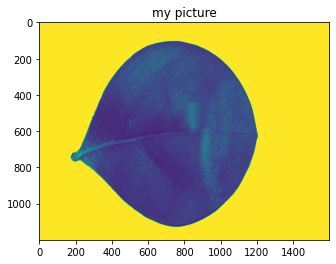

In [ ]:
import cv2

img = cv2.imread(r'/content/drive/MyDrive/test/Carissa Carandas (Karanda)/CC-S-062.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('my picture')
plt.show()

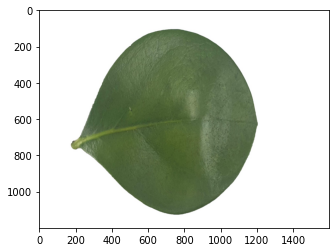

In [ ]:
img = cv2.imread(r'/content/drive/MyDrive/test/Carissa Carandas (Karanda)/CC-S-062.jpg')	
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)		

plt.imshow(rgb_img)
plt.show()